In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

#models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#validation libraries
from sklearn.cross_validation import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics


%matplotlib inline

C:\Users\vaibv\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# here's one sample
sample_dict = [
    {'label': 'house i would like', 'sqft':5000},
    {'label': 'house i would hate','sqft':500},
    {'label': 'house i live in', 'sqft':800}
]
pd.DataFrame(sample_dict)

,label,sqft
0,house i would like,5000
1,house i would hate,500
2,house i live in,800


In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [8]:
"""
When is it an array? When is it a Dataframe?, note the difference [ ] vs [[ ]]


An vector is a 1-D collection, either a list, a set, numpy.array, or even a pandas.series
A matrix is typically a 2-D collection of rows and columns such as a nested list, a numpy.array or a pandas.DataFrame
When working with DataFrames and matrices, there's a lot of methods to convert one to the other:
  - `pandas.DataFrame.asmatrix()`
  - `pandas.DataFrame.to_dense()`
"""

"\nWhen is it an array? When is it a Dataframe?, note the difference [ ] vs [[ ]]\n\n\nAn vector is a 1-D collection, either a list, a set, numpy.array, or even a pandas.series\nA matrix is typically a 2-D collection of rows and columns such as a nested list, a numpy.array or a pandas.DataFrame\nWhen working with DataFrames and matrices, there's a lot of methods to convert one to the other:\n  - `pandas.DataFrame.asmatrix()`\n  - `pandas.DataFrame.to_dense()`\n"

In [9]:
train_df['SalePrice'].head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [10]:
train_df[['SalePrice']].head(5)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [11]:
train_df.as_matrix()

C:\Users\vaibv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [12]:
pd.DataFrame(train_df.as_matrix()).head()

C:\Users\vaibv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
train_df[['SalePrice','LotShape']].head(4)

,SalePrice,LotShape
0,208500,Reg
1,181500,Reg
2,223500,IR1
3,140000,IR1


In [14]:
train_df.iloc[range(3),]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [15]:
train_df[train_df['SalePrice']>200000].head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
train_df[train_df['LotShape'].isin(['Reg','IR1'])].head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [17]:
print('this many columns:%d ' % len(train_df.columns))
train_df.columns

this many columns:81 


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
train_df.columns = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirsstFlrSF', 'SecondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

In [19]:
"""
Check for Blanks or NA's!
Note that there is a difference between NaN, '', None so be aware when looking at your data

NaN = not a number, still a float type, so think of it of empty space that can still be passed through numerical operations
'' = is a empty string type
None = is also a empty space, but in DataFrames it is considered an object which cannot be processed through optimized numerical operations
"""

"\nCheck for Blanks or NA's!\nNote that there is a difference between NaN, '', None so be aware when looking at your data\n\nNaN = not a number, still a float type, so think of it of empty space that can still be passed through numerical operations\n'' = is a empty string type\nNone = is also a empty space, but in DataFrames it is considered an object which cannot be processed through optimized numerical operations\n"

In [20]:
train_df[train_df['Alley'].isnull()].head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [21]:
train_df['Alley'].fillna(0, inplace=True)

In [22]:
na_totals = train_df.isnull().sum()

In [23]:
na_totals

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [24]:
na_totals = train_df.isnull().sum().sort_values(ascending=False)
na_totals[na_totals>0]

PoolQC          1453
MiscFeature     1406
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [25]:
train_df.fillna(0, inplace=True)

In [26]:
numeric_cols = [x for x in train_df.columns if ('Area' in x) | ('SF' in x)] + ['SalePrice','LotFrontage','MiscVal','EnclosedPorch','ThreeSsnPorch','ScreenPorch','OverallQual','OverallCond','YearBuilt']

for col in numeric_cols:
    train_df[col] = train_df[col].astype(float)
numeric_cols

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'FirsstFlrSF',
 'SecondFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'LotFrontage',
 'MiscVal',
 'EnclosedPorch',
 'ThreeSsnPorch',
 'ScreenPorch',
 'OverallQual',
 'OverallCond',
 'YearBuilt']

In [27]:
categorical_cols = [x for x in train_df.columns if x not in numeric_cols]

for col in categorical_cols:
    train_df[col] = train_df[col].astype('category')

In [28]:
## Applying an element wise function
train_df['LogSalePrice'] = train_df['SalePrice'].map(lambda x : np.log(x)) 

#Vectorized log function acting on a vector
# then assigning all the values at once
train_df['LogSalePrice'] = np.log(train_df['SalePrice'])

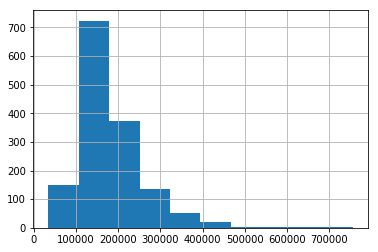

In [29]:
train_df['SalePrice'].hist()

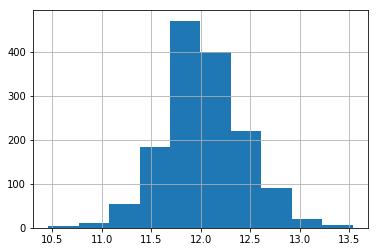

In [30]:
train_df['LogSalePrice'].hist()

In [31]:
# element wise function to transform
train_df['above_200k'] = train_df['SalePrice'].map(lambda x : 1 if x > 200000 else 0) 
train_df['above_200k'] = train_df['above_200k'].astype('category')

In [32]:
# manually assign the values to your new field, section by section
# with row filtering
train_df.loc[train_df['SalePrice']>200000,'above_200k'] = 1
train_df.loc[train_df['SalePrice']<=200000,'above_200k'] = 0
train_df['above_200k'] = train_df['above_200k'].astype('category')

In [33]:
train_df['LivArea_Total'] = train_df['GrLivArea'] + train_df['GarageArea'] + train_df['PoolArea']
train_df[['LivArea_Total','GrLivArea','GarageArea','PoolArea']].head()

,LivArea_Total,GrLivArea,GarageArea,PoolArea
0,2258.0,1710.0,548.0,0.0
1,1722.0,1262.0,460.0,0.0
2,2394.0,1786.0,608.0,0.0
3,2359.0,1717.0,642.0,0.0
4,3034.0,2198.0,836.0,0.0


In [34]:
"""
Pandas: how to apply a function row - wise (example is adding strings)
axis=0 - pass a column of data
axis=1 - pass a row of data
"""

'\nPandas: how to apply a function row - wise (example is adding strings)\naxis=0 - pass a column of data\naxis=1 - pass a row of data\n'

In [35]:
## concatenating two different fields together in the same row
train_df['Lot_desc'] = train_df.apply(lambda val : val['MSZoning'] + val['LotShape'], axis=1)
train_df[['Lot_desc','MSZoning','LotShape']].head()

,Lot_desc,MSZoning,LotShape
0,RLReg,RL,Reg
1,RLReg,RL,Reg
2,RLIR1,RL,IR1
3,RLIR1,RL,IR1
4,RLIR1,RL,IR1


In [36]:
train_df['LotArea_norm'] = train_df['LotArea']

ss = StandardScaler()
mas = MaxAbsScaler()
qs = QuantileTransformer()

train_df['LotArea_norm'] = ss.fit_transform(train_df[['LotArea']])
train_df['LotArea_mas'] = mas.fit_transform(train_df[['LotArea']])
train_df['LotArea_qs'] = qs.fit_transform(train_df[['LotArea']])


train_df[['LotArea_norm','LotArea_mas','LotArea_qs', 'LotArea']].head(5)

,LotArea_norm,LotArea_mas,LotArea_qs,LotArea
0,-0.207142,0.039258,0.349349,8450.0
1,-0.091886,0.044600,0.525025,9600.0
2,0.073480,0.052266,0.720220,11250.0
3,-0.096897,0.044368,0.509667,9550.0
4,0.375148,0.066250,0.897123,14260.0


In [37]:
small_df = train_df[['MSZoning','SalePrice']].copy()
small_df['MSZoning'] = small_df['MSZoning'].astype('category')
small_df.head()

,MSZoning,SalePrice
0,RL,208500.0
1,RL,181500.0
2,RL,223500.0
3,RL,140000.0
4,RL,250000.0


In [58]:
small_df = train_df[['MSSubClass','SalePrice']].copy()
small_df['MSSubClass'] = small_df['MSSubClass'].astype('category')
small_df.head()

,MSSubClass,SalePrice
0,60,208500.0
1,20,181500.0
2,60,223500.0
3,70,140000.0
4,60,250000.0


In [59]:
le = LabelEncoder()
trf_MSSubClass = le.fit_transform(small_df['MSSubClass'])
trf_MSSubClass

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [41]:
le.classes_

array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
       180, 190], dtype=int64)

In [42]:
le.inverse_transform(trf_MSSubClass)

C:\Users\vaibv\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([60, 20, 60, ..., 70, 20, 20], dtype=int64)

In [43]:
feature_cols = [col for col in train_df.columns if 'Price' not in col]

In [60]:
y = train_df['LogSalePrice']
X = train_df[feature_cols]
print(y.head(2),'\n\n', X.head(2))

0    12.247694
1    12.109011
Name: LogSalePrice, dtype: float64 

   Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1         60       RL         65.0   8450.0   Pave     0      Reg   
1  2         20       RL         80.0   9600.0   Pave     0      Reg   

  LandContour Utilities     ...     MoSold YrSold SaleType SaleCondition  \
0         Lvl    AllPub     ...          2   2008       WD        Normal   
1         Lvl    AllPub     ...          5   2007       WD        Normal   

  above_200k LivArea_Total Lot_desc  LotArea_norm  LotArea_mas  LotArea_qs  
0          1        2258.0    RLReg     -0.207142     0.039258    0.349349  
1          0        1722.0    RLReg     -0.091886     0.044600    0.525025  

[2 rows x 86 columns]


In [79]:
X_numerical = pd.get_dummies(X)
X_numerical.head(5)

,Intercept,Id[T.2],Id[T.3],Id[T.4],Id[T.5],Id[T.6],Id[T.7],Id[T.8],Id[T.9],Id[T.10],...,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,LivArea_Total,LotArea_norm,LotArea_mas,LotArea_qs
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.0,0.0,0.0,0.0,0.0,0.0,2258.0,-0.207142,0.039258,0.349349
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1722.0,-0.091886,0.044600,0.525025
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,0.0,0.0,0.0,0.0,0.0,2394.0,0.073480,0.052266,0.720220
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,272.0,0.0,0.0,0.0,0.0,2359.0,-0.096897,0.044368,0.509667
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,84.0,0.0,0.0,0.0,0.0,0.0,3034.0,0.375148,0.066250,0.897123


In [ ]:
#import patsy
#formula = 'LogSalePrice ~ %s' % (' + '.join(feature_cols)) 
#y, X = patsy.dmatrices(formula, train_df, return_type='dataframe')
#print(y.head(2),'\n\n', X.head(2))

In [80]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 170
n_trn = len(y)-n_valid
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(y, n_trn)

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1290, 1951) (170, 1951) (1290, 1) (170, 1)


In [81]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(1168, 1951) (292, 1951) (1168, 1) (292, 1)


In [82]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
lm.score(X_train,y_train)

1.0

In [84]:
lm.score(X_valid,y_valid)

0.7590591094052376

In [85]:
y_pred = lm.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.20713666668118932

In [86]:
rdgCV = RidgeCV(alphas=[0.01,0.1,1,10,100,1000], cv=5)
rdgCV.fit(X_train,y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 1000], cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [87]:
print(rdgCV.alpha_)

10


In [88]:
rdg = Ridge(alpha=10)
rdg.fit(X_train, y_train)
rdg.score(X_valid, y_valid)

0.7531067660786523

In [89]:
y_pred = rdg.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.20967966865388699

In [90]:
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100)
rfr.fit(X,y)

C:\Users\vaibv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
rfr.score(X_valid,y_valid)

0.9862887695852043

In [92]:
y_pred = rfr.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

0.04941285438222289